In [1]:
from qiskit import QuantumCircuit
from qiskit.providers.basic_provider import BasicSimulator
from qiskit.visualization import plot_histogram
from qiskit.primitives import BackendSampler
from qiskit.quantum_info import SparsePauliOp
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
from qiskit_ibm_runtime import EstimatorV2 as Estimator
from qiskit.quantum_info import SparsePauliOp
from qiskit_ibm_runtime import EstimatorV2 as Estimator
from numpy import pi
import numpy as np
import matplotlib.pyplot as plt

In [48]:
angle = 0.5625
testing_angle = 9*pi/8

In [83]:
def recircuit(theta):
    circuit = QuantumCircuit(2,1)
    circuit.x(1)
    circuit.barrier()
    circuit.h(0)
    circuit.cp(2*pi*theta,0,1)
    circuit.h(0)
    circuit.barrier()
    circuit.measure(0,0)
    return circuit

In [85]:
def imcircuit(theta):
    circuit = QuantumCircuit(2,1)
    circuit.x(1)
    circuit.barrier()
    circuit.h(0)
    circuit.s(0)
    circuit.cp(2*pi*theta,0,1)
    circuit.h(0)
    circuit.barrier()
    circuit.measure(0,0)
    return circuit

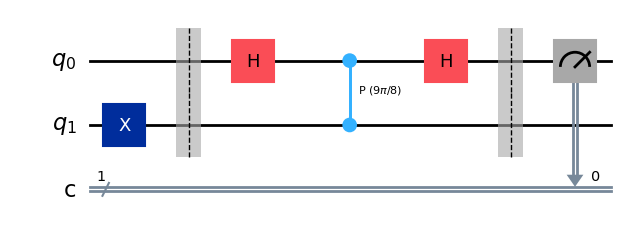

In [84]:
qc = recircuit(angle)
qc.draw("mpl")

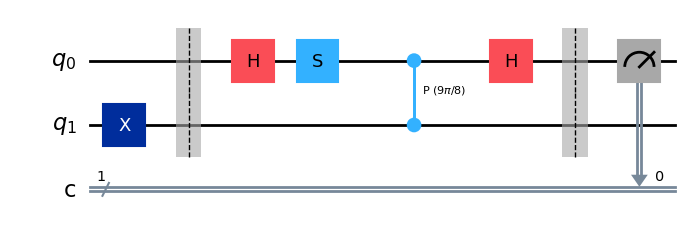

In [87]:
qc2 = imcircuit(angle)
qc2.draw("mpl")

In [88]:
backend = BasicSimulator()

num_of_shots = 100000

result = backend.run(qc, shots=num_of_shots).result()   
counts = result.get_counts()                    

result2 = backend.run(qc2, shots=num_of_shots).result()   
counts2 = result2.get_counts()                

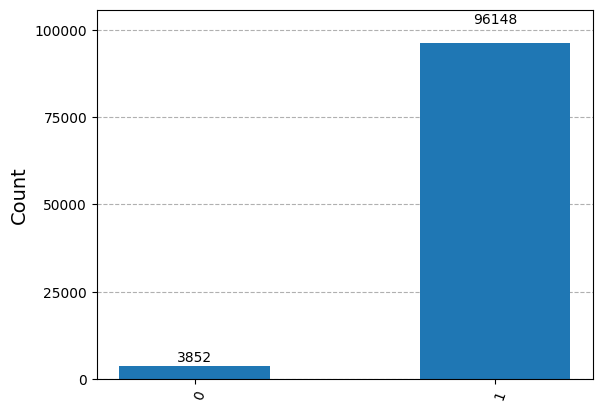

In [89]:
plot_histogram(counts)

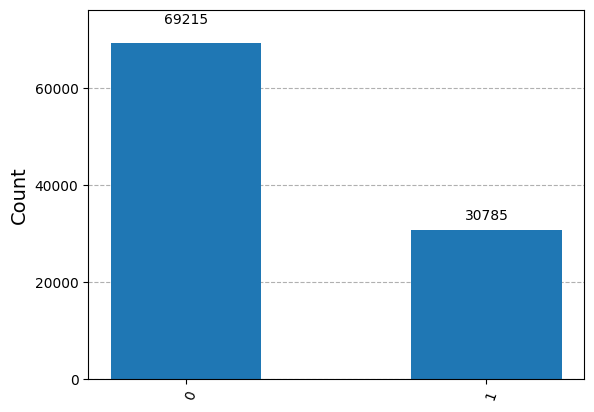

In [90]:
plot_histogram(counts2)

In [114]:
print("Results of the Trial: ", counts)
re = 1-(2*(counts['1']/num_of_shots))
im = (2*(counts2['1']/num_of_shots))-1

phi1 = np.arccos(re)/(2*pi)
phi2 = np.arcsin(im)/(2*pi)

print("Phi 1: ", phi1, "\nPhi 2: ", phi2)
print("What we got: ", phi1)
print("What we want: ", angle)

Results of the Trial:  {'1': 96115, '0': 3885}
Phi 1:  0.436846324153373 
Phi 2:  -0.06277858411915478
What we got:  0.436846324153373
What we want:  0.5625


In [115]:
print('Probability of measuring 1', counts['1']/num_of_shots)
print('Probability of measuring 0', counts['0']/num_of_shots)
print('Calculated probability of measuring 1: ', np.sin(angle*pi)**2)
print('Calculated probability of measuring 0: ',np.cos(angle*pi)**2)

Probability of measuring 1 0.96115
Probability of measuring 0 0.03885
Calculated probability of measuring 1:  0.9619397662556434
Calculated probability of measuring 0:  0.03806023374435659


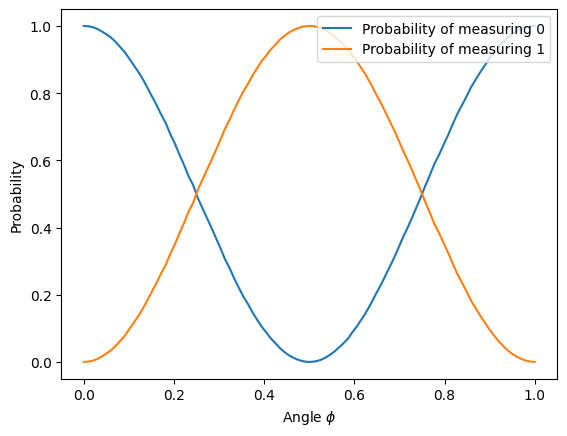

In [110]:
backend = BasicSimulator()

angles = np.linspace(0, 1, 100)
prob0 = []
prob1 = []
expected_phi = angles
for ang in angles:
    circ = recircuit(ang)
    num_of_shots = int(num_of_shots)
    counts = backend.run(circ, shots=num_of_shots).result().get_counts()
    prob0val = counts.get('0')
    prob1val = counts.get('1')
    if prob0val is not None and prob1val is not None:        
        prob0.append(counts['0']/num_of_shots)
        prob1.append(counts['1']/num_of_shots)
    elif prob0val is None:
        prob0.append(0)
        prob1.append(counts['1']/num_of_shots)
    elif prob1val is None:
        prob1.append(0)
        prob0.append(counts['0']/num_of_shots)
plt.plot(angles, prob0, label = 'Probability of measuring 0')
plt.plot(angles, prob1, label = 'Probability of measuring 1')
plt.xlabel('Angle $\phi$')
plt.ylabel('Probability')
plt.legend(loc = 'upper right')
plt.show()

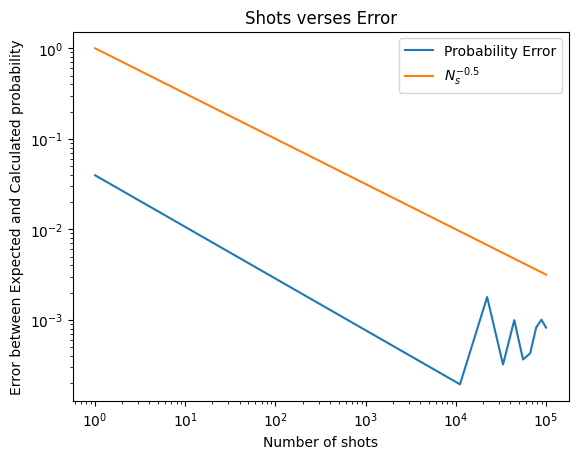

In [111]:
# Construct a graph of error verses number of shots
backend = BasicSimulator()

trials = np.linspace(1, 10**5, 10)
Ns = []
error_diff = []
expected_phi = testing_angle / (2*pi)
for num_of_shots in trials:
    # for some reason python doesn't believe I made it an int
    num_of_shots = int(num_of_shots)
    counts = backend.run(qc, shots=num_of_shots).result().get_counts()   
    re = 1-(2*counts['1']/num_of_shots)
    phi = np.arccos(re)/(2*pi)
    error_diff.append( (abs(np.sin(angle*pi)**2-(counts['1']/num_of_shots)))/np.sin(angle*pi)**2 )
    Ns.append(num_of_shots**(-0.5))
plt.loglog(trials, error_diff, label = 'Probability Error')
plt.loglog(trials, Ns, label = '$N_s^{-0.5}$')
plt.title("Shots verses Error")
plt.xlabel("Number of shots")
plt.ylabel("Error between Expected and Calculated probability")
plt.legend(loc='upper right')
plt.show()